In [34]:
#importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFECV



#collect the data and load them


In [35]:
file_path = os.path.join('..', 'data', 'Student_Performance.csv') 
data=pd.read_csv(file_path)
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,NaN,1,91
1,4,82,No,4.0,2,65
2,8,51,Yes,7.0,2,45
3,5,52,Yes,5.0,2,36
4,7,75,No,NaN,5,66


Data preprocessing 


In [36]:
# Convert categorical values into numerical or boolean values
new_data = pd.get_dummies(data, drop_first=True)
new_data.head()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,NaN,1,91,True
1,4,82,4.0,2,65,False
2,8,51,7.0,2,45,True
3,5,52,5.0,2,36,True
4,7,75,NaN,5,66,False


In [37]:
#check the missing values and get the sum of them
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         2
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [38]:
#filling the missing values with according column mean or median
new_data.fillna(new_data.mean(),inplace=True)
new_data.head()
#find the duplictae datasets and drop them
new_data.drop_duplicates(inplace=True)
print("Duplicate row count : ",new_data.duplicated().sum())


Duplicate row count :  0


Rename the columns and separate the target value and features

In [39]:
new_data.columns = ["Study Hours", "Previous Score", "Sleep Hours", "Practiced Sample Paper Count", "Score", "Extracurricular Activities"]
independent=new_data.drop("Score",axis=1)
dependent=new_data.iloc[:,4]
independent.head()
dependent.head()

0    91
1    65
2    45
3    36
4    66
Name: Score, dtype: int64

Analyse relationships between features and target


In [40]:
new_data.describe()

,Study Hours,Previous Score,Sleep Hours,Practiced Sample Paper Count,Score
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531253,4.583004,55.216651
std,2.589081,17.325601,1.697437,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


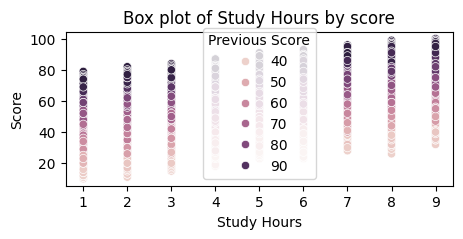

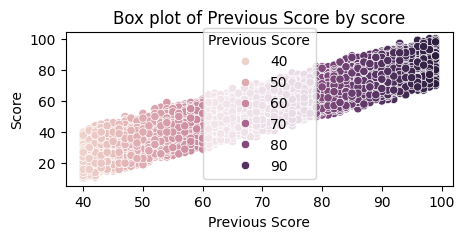

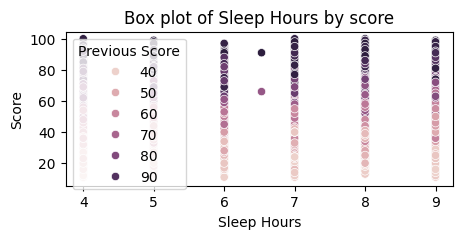

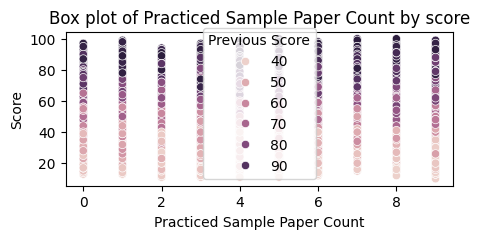

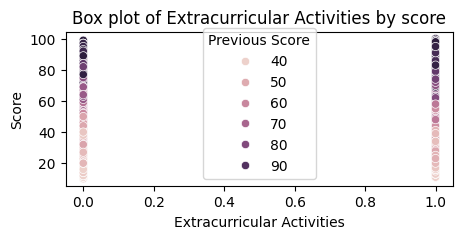

In [41]:
# Plotting scatter between features and targets
for columns in independent.columns:
    plt.figure(figsize=(5,2))
    sns.scatterplot(x = columns, y = dependent, data = new_data, hue = "Previous Score")
    plt.title(f'Box plot of {columns} by score')
    plt.xlabel(columns)
    plt.ylabel("Score")
    plt.show()

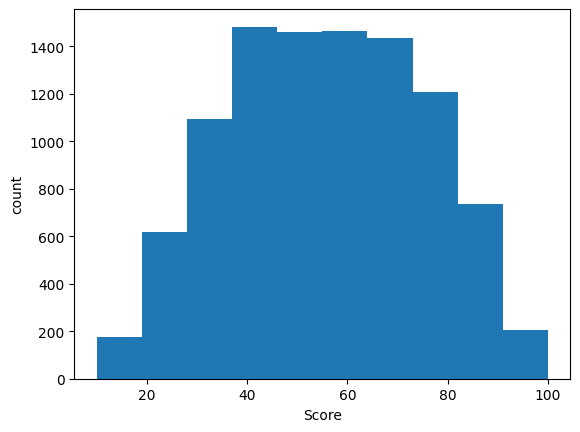

In [42]:
# Plotting score histogram for how many score count Scattered around data
plt.hist(dependent,bins=10)
plt.xlabel("Score")
plt.ylabel("count")
plt.show()

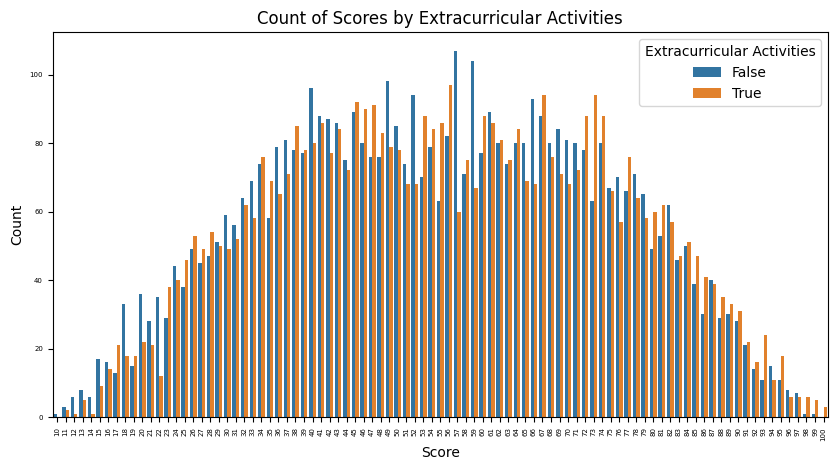

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x="Score", hue ="Extracurricular Activities", data=new_data)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Count of Scores by Extracurricular Activities')
plt.xticks(rotation=90,  fontsize=5)
plt.yticks( fontsize=5)
plt.show()

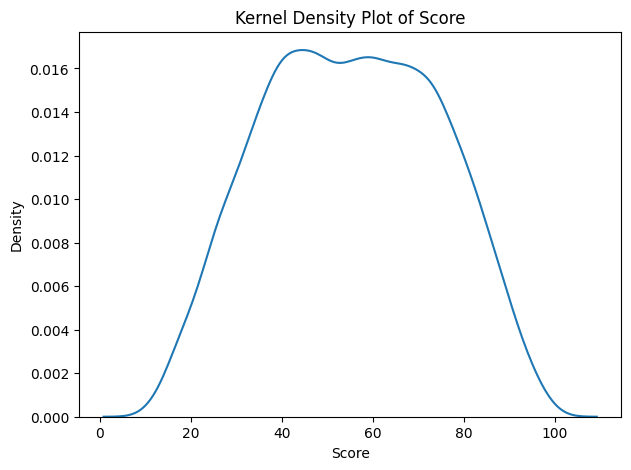

In [44]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=new_data,x="Score")
plt.xlabel("Score")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Score")
plt.show()

Split the Data for Training and Testing

In [45]:
x_train, x_test, y_train, y_test = train_test_split(independent,dependent,test_size=0.2,random_state=0)


Evaluate the model


In [46]:
model=LinearRegression()
model.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Check the Model Performance

In [47]:
#get predicted values for our tarined data
y_pred_train=model.predict(x_train)
#get perdicted values for our test data
y_pred_test=model.predict(x_test)


In [48]:
# Evaluate metrics for trained and test data predictors
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training MAE: {mae_train:.2f}, Testing MAE: {mae_test:.2f}")
print(f"Training MSE: {mse_train:.2f}, Testing MSE: {mse_test:.2f}")
print(f"Training R-squared: {r2_train:.2f}, Testing R-squared: {r2_test:.2f}")

Training MAE: 1.61, Testing MAE: 1.69
Training MSE: 4.10, Testing MSE: 4.49
Training R-squared: 0.99, Testing R-squared: 0.99


Plot the residual 

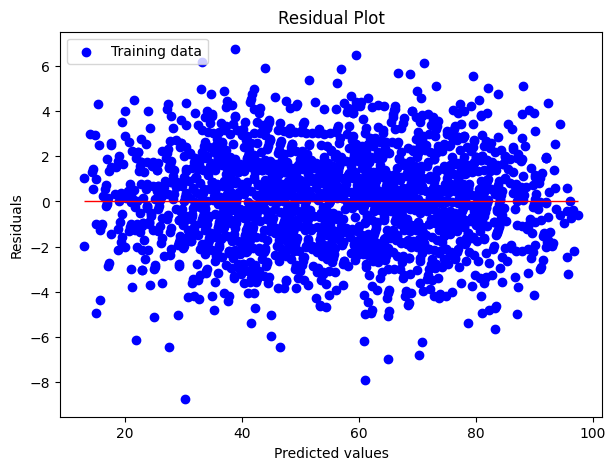

In [49]:
plt.figure(figsize=(7, 5))
plt.scatter(y_pred_test, y_pred_test - y_test, c='blue', marker='o', label='Training data')
plt.hlines(y=0, xmin=np.min(y_pred_test), xmax=np.max(y_pred_test), colors='red', lw=1)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend(loc='upper left')
plt.show()

Fine-tune the Model

In [50]:
#using for the remove the useless columns in data set for predection
REF_CV=RFECV(estimator=model,min_features_to_select=1,cv=10)
results=REF_CV.fit(independent,dependent)
results.support_ #give the which true or false means which column is kept after RFECV


array([ True,  True,  True,  True,  True])

In [51]:
selected_columns = independent.columns[results.support_]
selected_columns

Index(['Study Hours', 'Previous Score', 'Sleep Hours',
       'Practiced Sample Paper Count', 'Extracurricular Activities'],
      dtype='object')

Regularization

Hyperparameter optimization
Optimize hyperparameters to improve model performance.
1.Grid search technique
2.Random search technique

In [52]:
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


lasso_model=Lasso()
ridge_model=Ridge()

Grid Search


In [53]:
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=parameters, cv=10)
best_grid_param_lasso = grid_search_lasso.fit(independent,dependent)
print("Best parameters for Lasso (Grid search): ",best_grid_param_lasso.best_params_)

grid_serch_ridge=GridSearchCV(estimator=ridge_model,param_grid=parameters,cv=10)
best_grid_param_ridge=grid_serch_ridge.fit(independent,dependent)
print("Best parameters for Ridge (Grid search): ",best_grid_param_ridge.best_params_)


Best parameters for Lasso (Grid search):  {'alpha': 0.001}
Best parameters for Ridge (Grid search):  {'alpha': 1}


Random

In [54]:
random_search_lasso = RandomizedSearchCV(estimator=lasso_model, param_distributions=parameters, cv=10, n_iter=7)
best_params_lasso = random_search_lasso.fit(independent, dependent)
print("Best parameters for Lasso (Random search): ", best_params_lasso.best_params_)

random_search_ridge = RandomizedSearchCV(estimator=ridge_model, param_distributions=parameters, cv=10, n_iter=7)
best_params_ridge = random_search_ridge.fit(independent, dependent)
print("Best parameters for Ridge (Random search): ", best_params_ridge.best_params_)

Best parameters for Lasso (Random search):  {'alpha': 0.001}
Best parameters for Ridge (Random search):  {'alpha': 1}


Regularization
Apply techniques to prevent overfitting by adding a penalty to the model's complexity

In [55]:
lasso=Lasso(alpha=0.001)
ridge=Ridge(alpha=1)
print(lasso.fit(x_train,y_train))
print(ridge.fit(x_train,y_train))

Lasso(alpha=0.001)
Ridge(alpha=1)


In [56]:
y_pred_ridge=ridge.predict(x_test)
mse_ridge=mean_squared_error(y_test,y_pred_ridge)
print(f"Redge mean_squared_error :{mse_ridge}")

Redge mean_squared_error :4.490038392888302


In [57]:
y_pred_lasso=lasso.predict(x_test)
mse_lasso=mean_squared_error(y_test,y_pred_lasso)
print(f"Lasso mean_squared_error :{mse_lasso}")

Lasso mean_squared_error :4.489991702754201


Cross Validation(check how well a model will generalize (work on unseen data).)

For Linear Regression model

In [58]:
scores_1=cross_val_score(model,independent,dependent,cv=5,scoring="neg_mean_squared_error")

#negative MSE is used for scoring : convert to postive
mse_scores=-scores_1
print("cross validatiopn scores (MSE)",mse_scores)
print("Average Cross-validation",mse_scores.mean())

cross validatiopn scores (MSE) [4.19954754 4.17890463 3.97853574 4.22917841 4.31036621]
Average Cross-validation 4.179306504798317


Cross Validation for lasso

In [59]:
scores_lasso=cross_val_score(lasso,independent,dependent,cv=5,scoring="neg_mean_squared_error")
mse_scores_lasso=-scores_lasso
print("Cross Validation Score (Mse):",mse_scores_lasso)
print("Average Validation Score (Mse):",mse_scores_lasso.mean())

Cross Validation Score (Mse): [4.19957723 4.17909204 3.97857405 4.22906    4.31025922]
Average Validation Score (Mse): 4.179312510111474


Cross Validation for Ridge

In [60]:
score_ridge=cross_val_score(ridge,independent,dependent,cv=5,scoring="neg_mean_squared_error")
score_ridge_r2=cross_val_score(ridge,independent,dependent,cv=5,scoring="r2")
score_ridge_r2_=score_ridge_r2
print("Cross validtaion (R2):",score_ridge_r2_)
print("Average Cross validation (R2)",score_ridge_r2_.mean())

mse_scores_ridge=-score_ridge
print("Cross validation(MSE):",mse_scores_ridge)
print("Average Cross validation (MSE):",mse_scores_ridge.mean())

Cross validtaion (R2): [0.98883902 0.98820291 0.98904461 0.98906806 0.98815455]
Average Cross validation (R2) 0.9886618319823357
Cross validation(MSE): [4.1995414  4.17892287 3.97854204 4.22916608 4.31035952]
Average Cross validation (MSE): 4.179306381832535


Now Our Model is Redy for Predictions

In [61]:
independent.columns

Index(['Study Hours', 'Previous Score', 'Sleep Hours',
       'Practiced Sample Paper Count', 'Extracurricular Activities'],
      dtype='object')